In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [9]:
os.getcwd()

'C:\\Users\\user\\Desktop\\Heart_Disease_Project\\notebooks'

In [13]:
df = pd.read_csv("../data/heart_disease.csv")

In [14]:
df.head(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


In [15]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [16]:
df_clean = df.copy()
df_clean.replace(['?','NA','Nan','null'], np.nan ,inplace=True)

In [17]:
numeric_cols_with_idage = df_clean.select_dtypes(include=['number']).columns
numeric_cols = numeric_cols_with_idage.drop(['id', 'age'])
categorical_cols = df.select_dtypes(exclude=['number']).columns

In [18]:
print("Numeric Columns:", list(numeric_cols))
print("Categorical Columns:", list(categorical_cols))

Numeric Columns: ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']
Categorical Columns: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


In [19]:
numerical_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

In [20]:
df_clean[numeric_cols] = numerical_imputer.fit_transform(df_clean[numeric_cols])
df_clean[categorical_cols] = categorical_imputer.fit_transform(df_clean[categorical_cols])

In [21]:
print("\nRemaining missing values per column:")
print(df_clean.isna().sum())


Remaining missing values per column:
id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [22]:
print("\nOriginal shape:", df.shape)
print("After imputation:", df_clean.shape)


Original shape: (920, 16)
After imputation: (920, 16)


In [23]:
df_encoded = df_clean.copy()
df_encoded = pd.get_dummies(df_encoded,columns=categorical_cols,drop_first=True, dtype=int)

In [25]:
df_encoded.head()

,id,age,trestbps,chol,thalch,oldpeak,ca,num,sex_Male,dataset_Hungary,...,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,1,63,145.0,233.0,150.0,2.3,0.0,0.0,1,0,...,0,1,1,0,0,0,0,0,0,0
1,2,67,160.0,286.0,108.0,1.5,3.0,2.0,1,0,...,0,0,0,0,0,1,1,0,1,0
2,3,67,120.0,229.0,129.0,2.6,2.0,1.0,1,0,...,0,0,0,0,0,1,1,0,0,1
3,4,37,130.0,250.0,187.0,3.5,0.0,0.0,1,0,...,1,0,0,1,0,0,0,0,1,0
4,5,41,130.0,204.0,172.0,1.4,0.0,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [29]:
df_scaled = df_encoded.copy()

In [30]:
num_val = df_encoded.select_dtypes(include=['number']).columns
print(list(num_val))

['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num', 'sex_Male', 'dataset_Hungary', 'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina', 'fbs_True', 'restecg_normal', 'restecg_st-t abnormality', 'exang_True', 'slope_flat', 'slope_upsloping', 'thal_normal', 'thal_reversable defect']


In [37]:
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

scaler = StandardScaler()
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

In [38]:
df_scaled.head()

,id,age,trestbps,chol,thalch,oldpeak,ca,num,sex_Male,dataset_Hungary,...,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,1,1.007386,0.705176,0.303643,0.489727,1.368109,-0.361400,-0.871794,1,0,...,0,1,1,0,0,0,0,0,0,0
1,2,1.432034,1.518569,0.789967,-1.181478,0.611589,4.411152,0.879408,1,0,...,0,0,0,0,0,1,1,0,1,0
2,3,1.432034,-0.650479,0.266939,-0.345875,1.651804,2.820301,0.003807,1,0,...,0,0,0,0,0,1,1,0,0,1
3,4,-1.752828,-0.108217,0.459634,1.961979,2.502889,-0.361400,-0.871794,1,0,...,1,0,0,1,0,0,0,0,1,0
4,5,-1.328180,-0.108217,0.037541,1.365120,0.517024,-0.361400,-0.871794,0,0,...,0,0,0,0,0,0,0,1,1,0


In [41]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

Distribution of Numeric Features (Histograms)


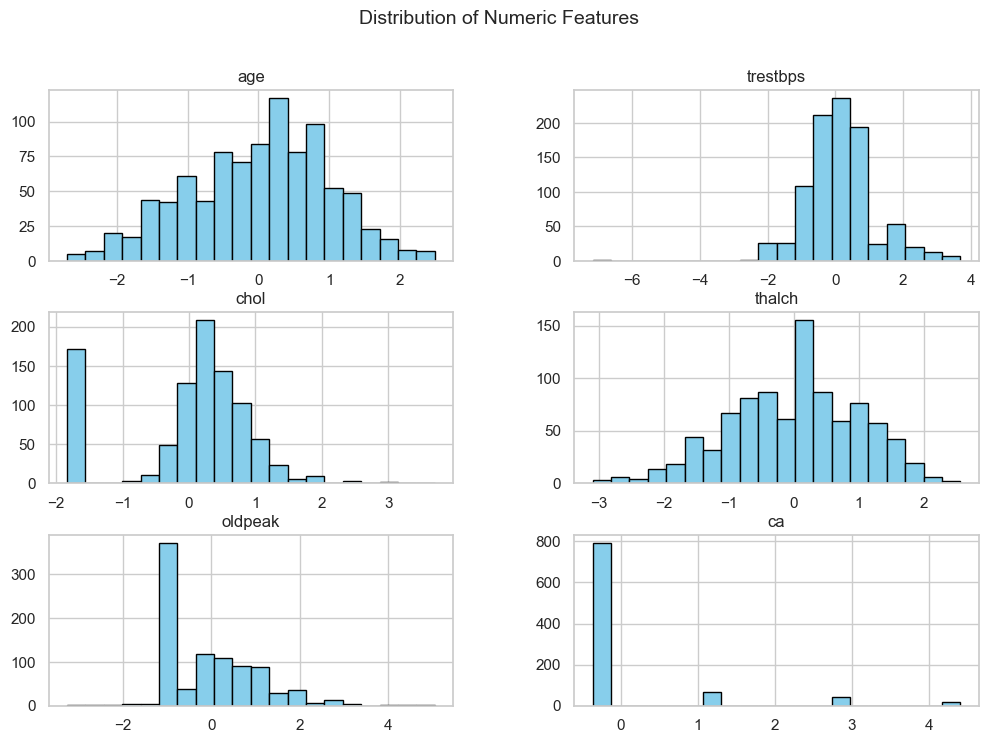

In [42]:
numeric_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

print("Distribution of Numeric Features (Histograms)")
df_scaled[numeric_cols].hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numeric Features", fontsize=14)
plt.show()

Correlation Heatmap


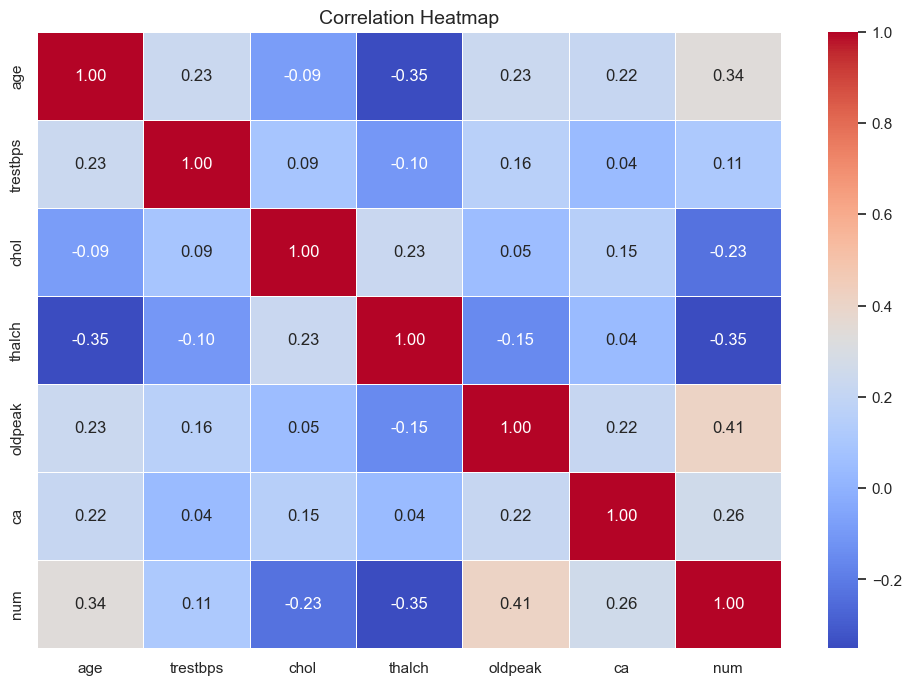

In [43]:
print("Correlation Heatmap")
plt.figure(figsize=(12, 8))
corr_matrix = df_scaled[numeric_cols + ['num']].corr()  
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

Boxplots for Numeric Features


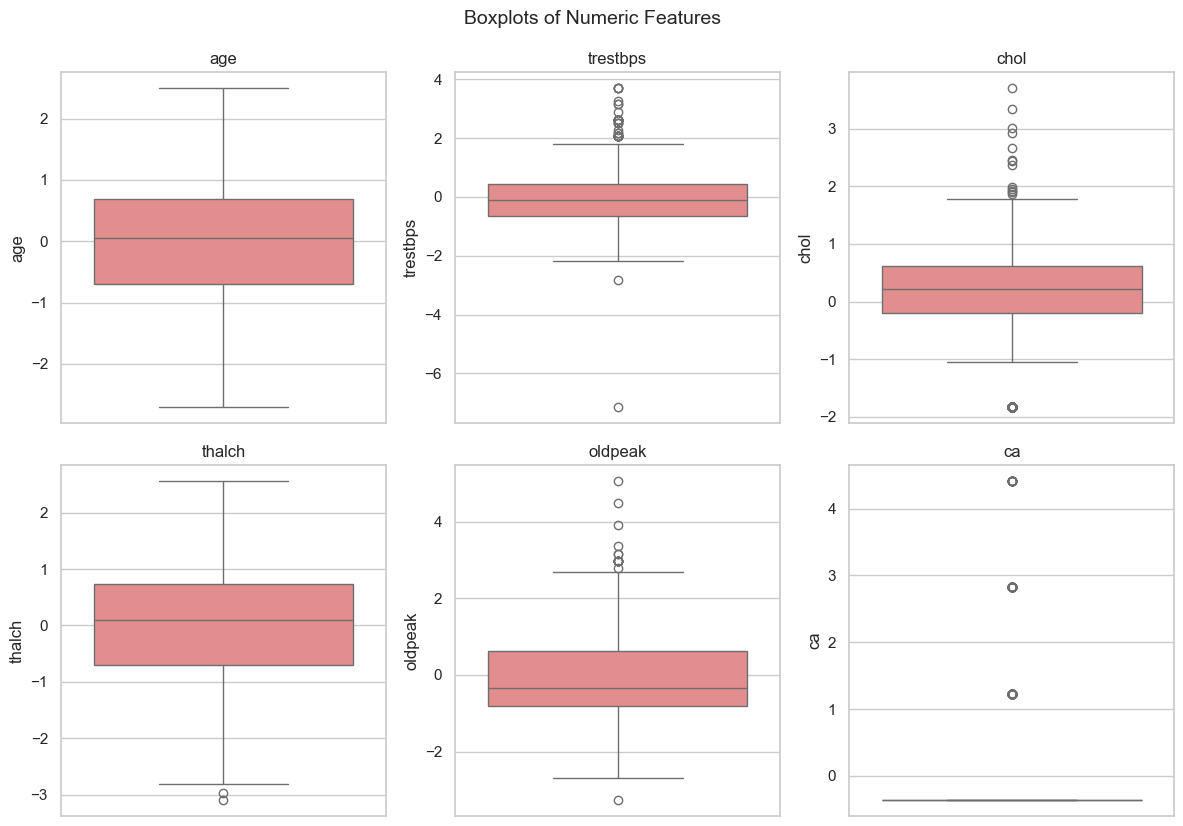

In [44]:
print("Boxplots for Numeric Features")
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df_scaled[col], color='lightcoral')
    plt.title(col)
plt.tight_layout()
plt.suptitle("Boxplots of Numeric Features", fontsize=14, y=1.03)
plt.show()

In [45]:
df_scaled.to_csv('../data/cleaned_heart_disease.csv',index=False)

In [46]:
print(f"Shape: {df_scaled.shape}")

Shape: (920, 23)
